In [ ]:
#%load_ext autoreload
#%autoreload 2
!pip install ultralytics

In [ ]:
from pathlib import Path
import fibroblast_detection as fd
from tqdm import tqdm

In [ ]:
in_dir = Path("./pics")
out_dir = Path("./out")
tmp_dir=Path("./tmp")
tmp_dir.mkdir(parents=True, exist_ok=True)
filenames = fd.get_filenames(in_dir)

In [ ]:
model = fd.load_model()
fd.create_stats_file(out_dir,in_dir)

In [ ]:
params = {
    "k":3,
    "sobel_cell_threshold":1,
    "interference_pixel_value":120,
    "disturbing_mesh":40000,
    "min_regions_mash":4,
    "min_mash_hole_size":625,
    "min_crop_ratio":0.9,
    "sobel_arms_threshold": 1,
    "background_ratio":0.7,
    "r":50,
    "smooth_radius":5,
    "round_radius":5
    }

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import pickle

with open("masks.pkl", "rb") as f:
    masks = pickle.load(f)

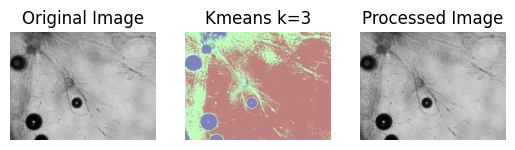

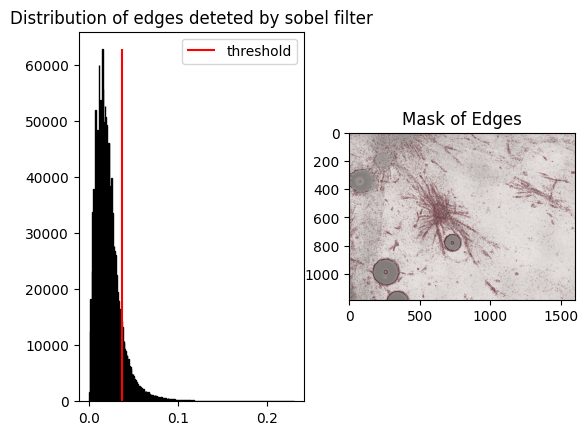

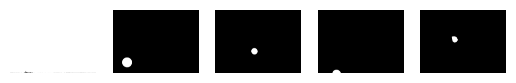

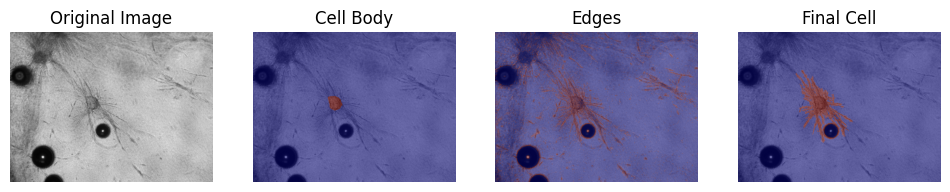

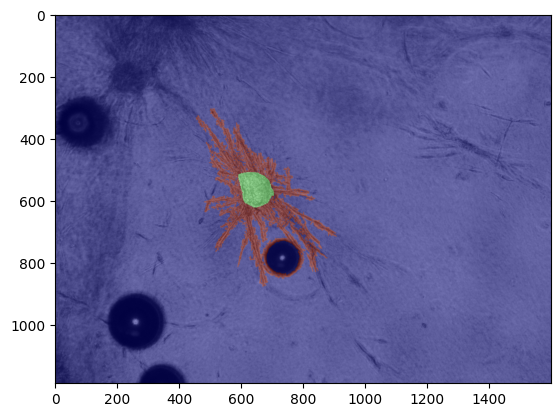

Didn't found cellbody, image: bubbles_2.jpeg


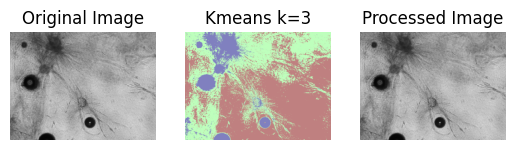

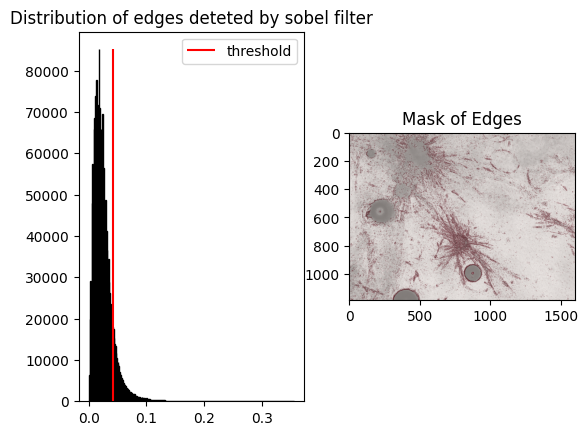

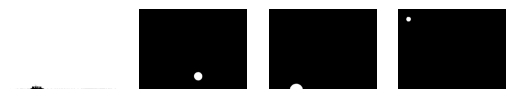

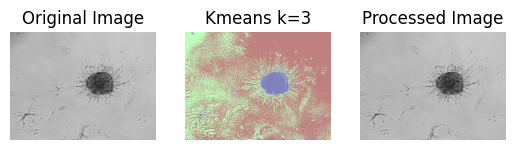

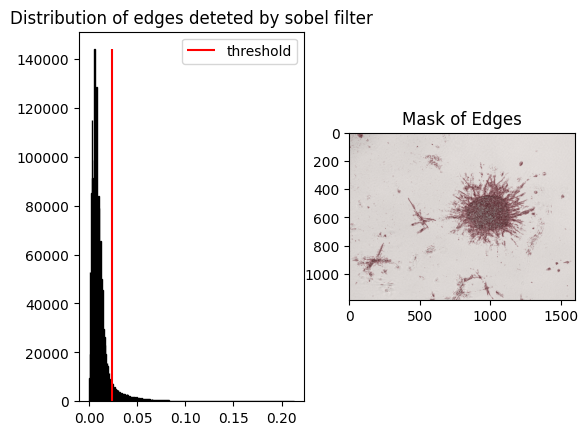

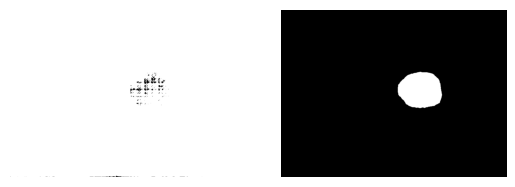

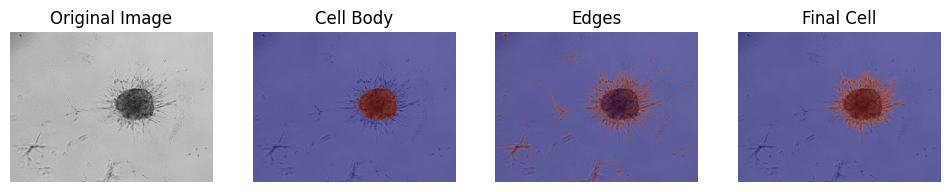

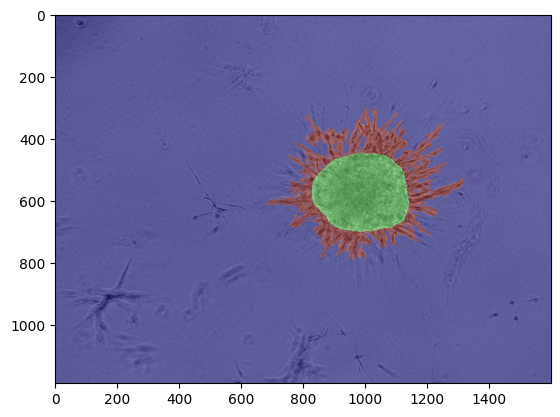

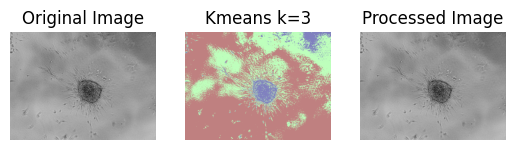

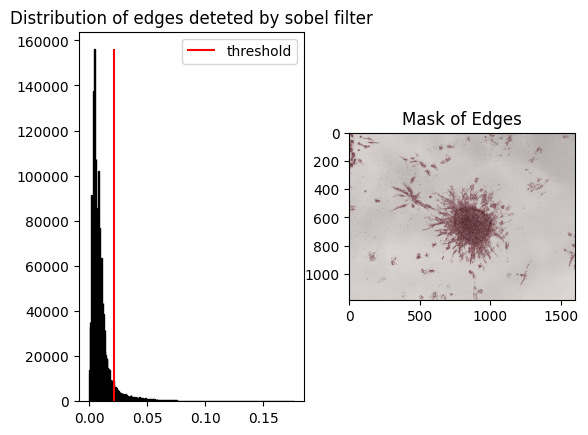

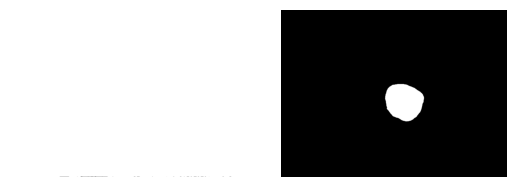

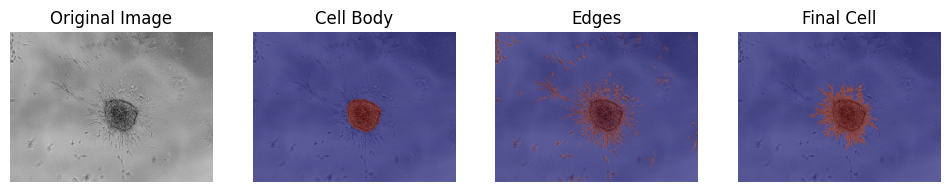

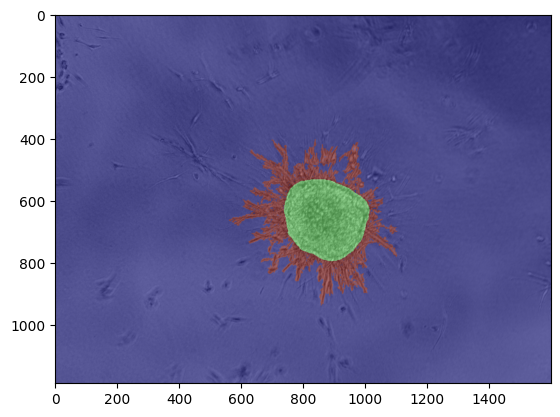

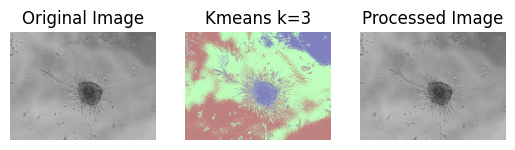

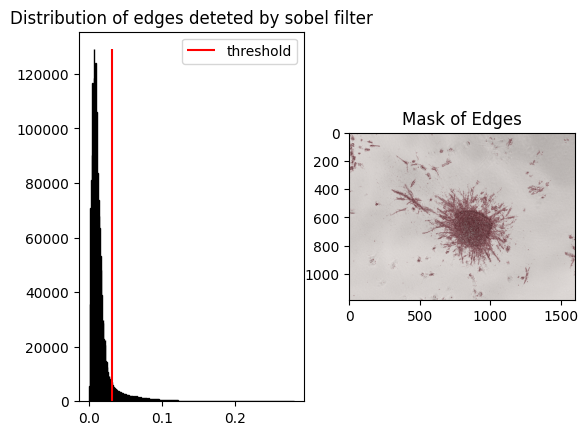

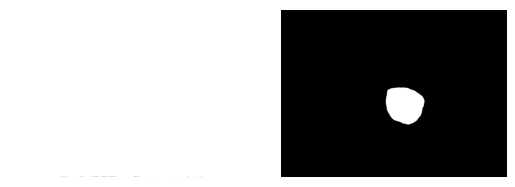

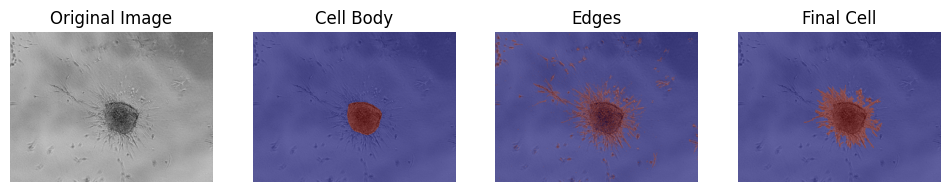

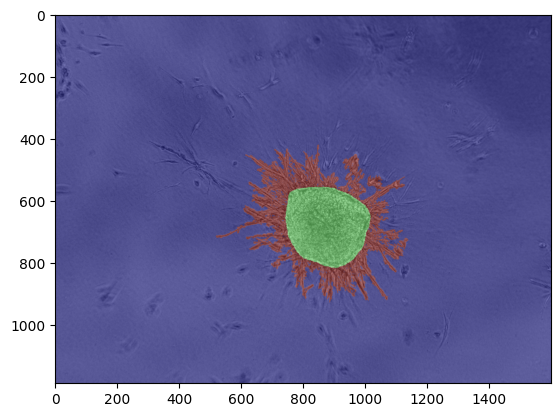

Didn't found cellbody, image: easy_4.jpeg


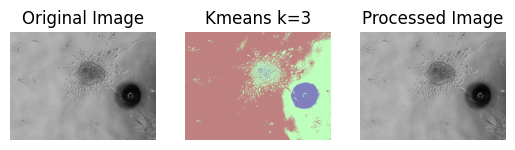

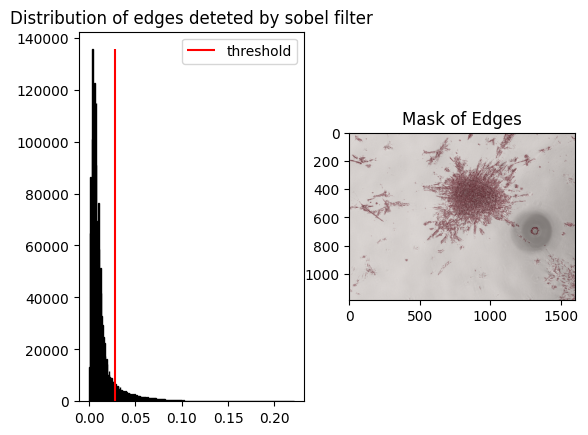

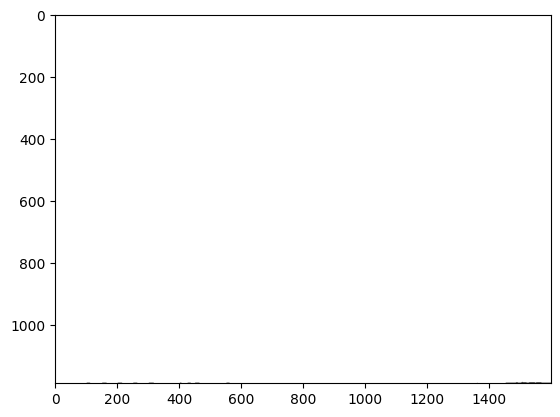

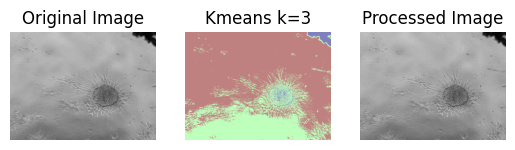

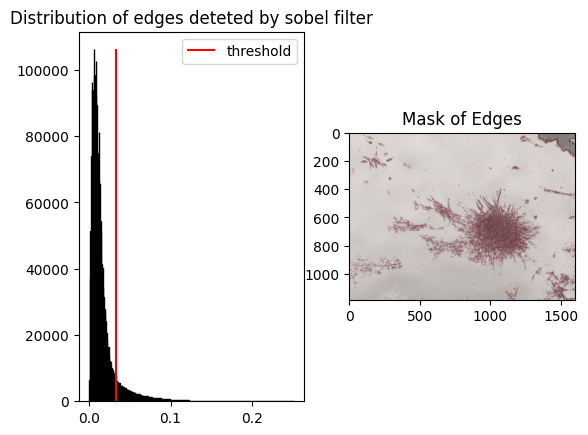

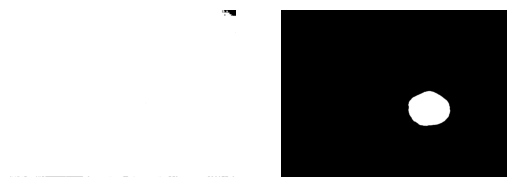

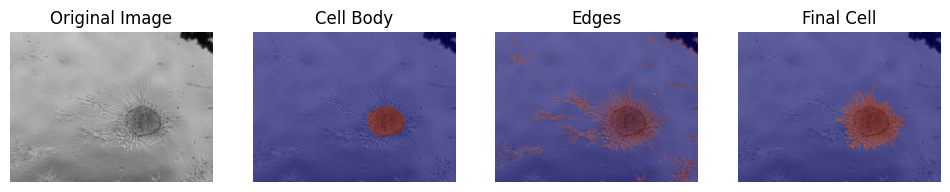

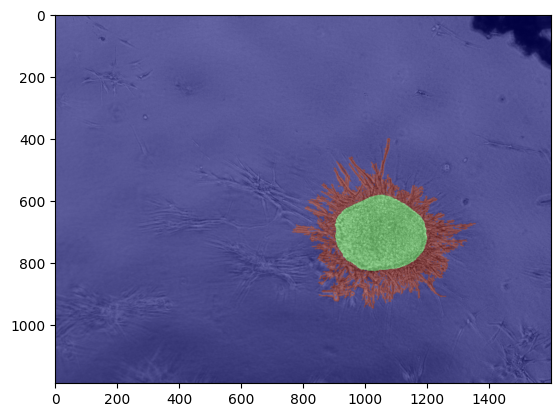

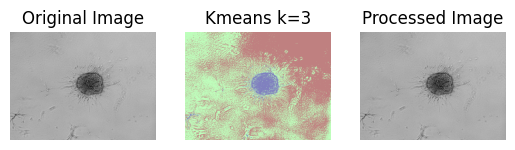

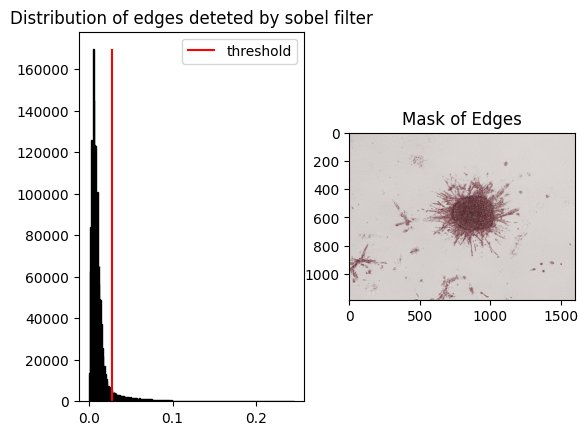

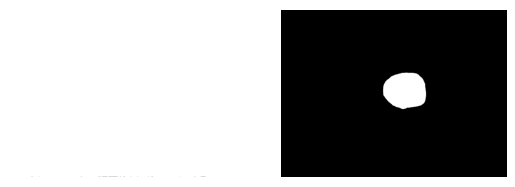

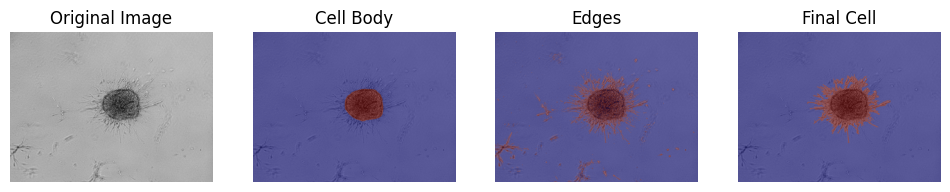

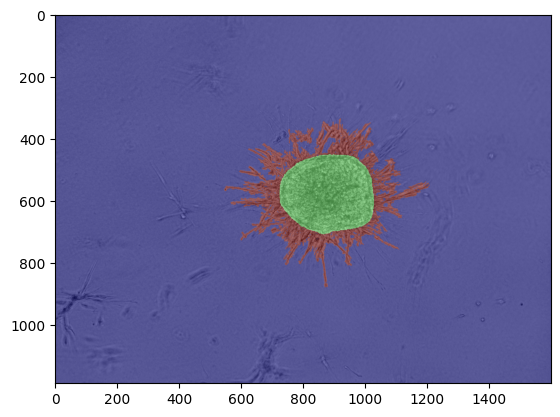

Didn't found cellbody, image: mesh_1.jpeg


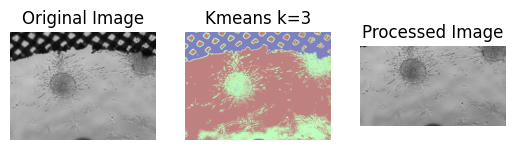

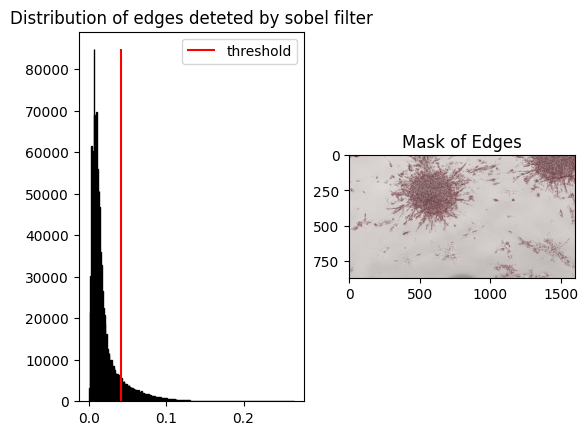

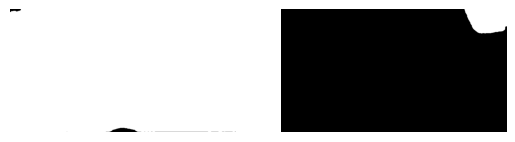

Didn't found cellbody, image: mesh_2.jpeg


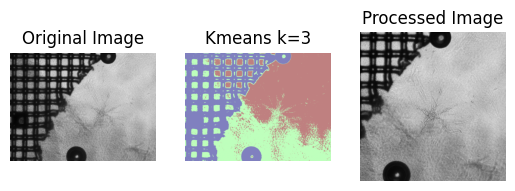

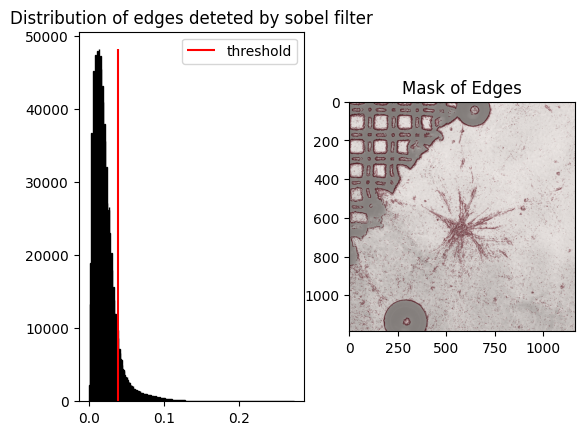

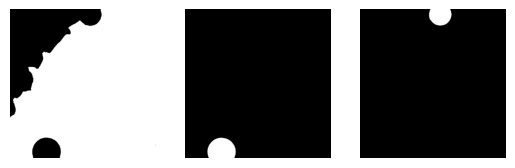

Didn't found cellbody, image: mesh_3.jpeg


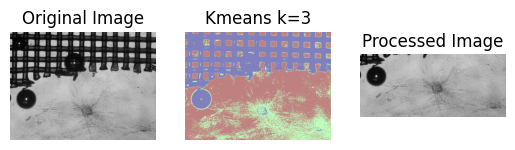

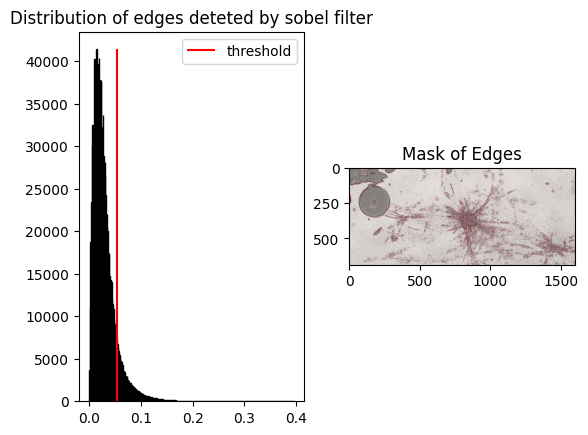

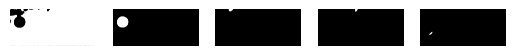

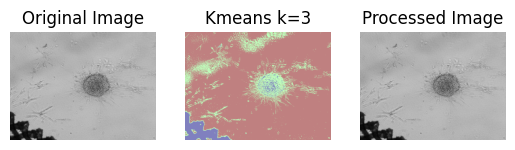

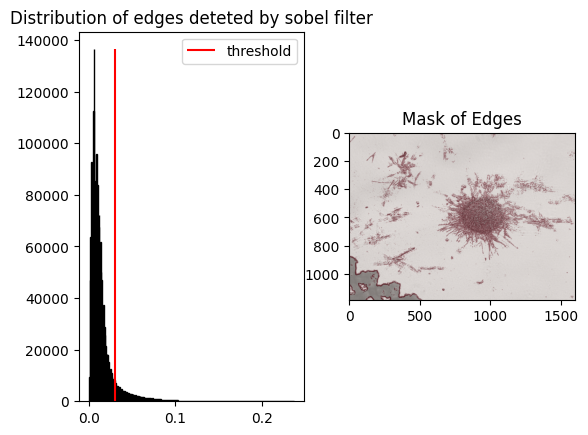

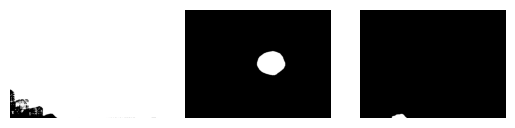

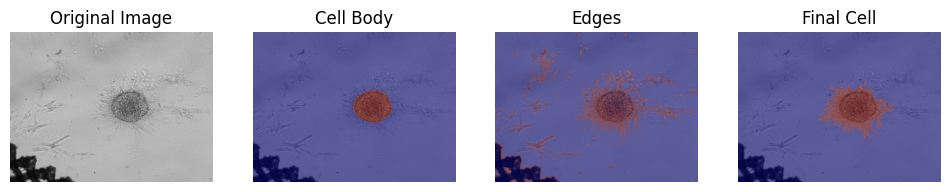

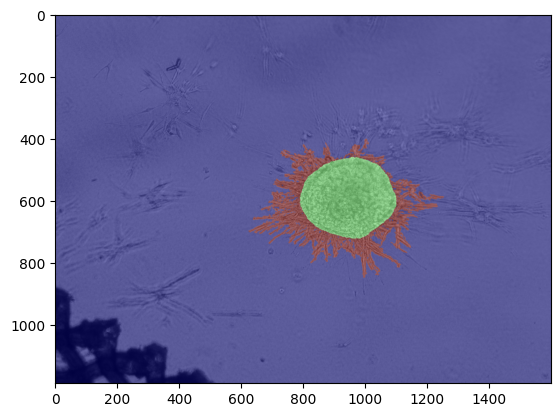

Finished all pictures


In [ ]:

for mask,image_path in zip(masks,filenames):
    image = fd.load_image(image_path,**params)
    fd.preprocess_image(image)
    #fd.start_detect_in_image(image,model)
    image.find_cell_in_image(model=None,masks=mask)

    fd.write_to_stats_file(image,out_dir,in_dir)
    image.plot_preprocessing(save_dir=out_dir)
    image.plot_threshold_histogram(save_dir=out_dir)
    image.plot_segmentation_masks(save_dir=out_dir)
    image.plot_cell_with_edges(save_dir=out_dir)
    image.plot_cell_areas(save_dir=out_dir)
print("Finished all pictures")
